In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

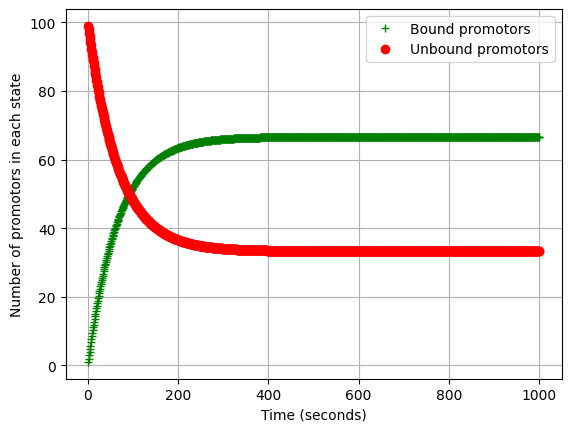

In [5]:

# Parameters
kon = 0.01  # attachment rate, s^-1 uM^-1
koff = 0.005  # unbinding rate s^-1
C = 1.0  # microMolar, concentration of transcription factor

# Set up a figure
plt.figure()
plt.xlabel('Time (seconds)')
plt.ylabel('Number of promotors in each state')
plt.grid(True)  # Adds a grid, equivalent to MATLAB's 'box on'

# Initial conditions
u_bound = 0
u_unbound = 100  # the total number of times this promoter occurs in the system

dt = 1  # second; EVERY SECOND, update the number of bound and unbound promotors
ntmax = 1000

bound_data = []  # To store bound data for plotting
unbound_data = []  # To store unbound data for plotting
time_data = []  # To store time data for plotting

for nt in range(1, ntmax + 1):
    
    u_bound_new = u_bound + (kon * C * u_unbound - koff * u_bound) * dt
    u_unbound_new = u_unbound + (-kon * C * u_unbound + koff * u_bound) * dt

    # Update current states
    u_bound, u_unbound = u_bound_new, u_unbound_new
    
    # Store data for plotting
    bound_data.append(u_bound)
    unbound_data.append(u_unbound)
    time_data.append(nt)

# Plotting
plt.plot(time_data, bound_data, '+g', label='Bound promotors')
plt.plot(time_data, unbound_data, 'or', label='Unbound promotors')
plt.legend()
plt.show()

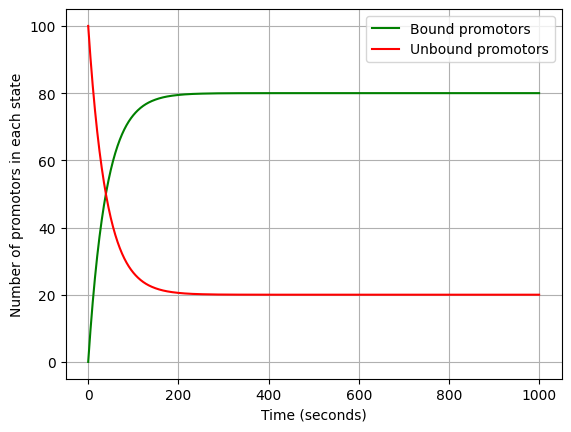

In [6]:

# Parameters
kon = 0.01  # attachment rate, s^-1 uM^-1
koff = 0.005  # unbinding rate s^-1
C = 2.0  # microMolar, concentration of transcription factor
initialCondition = [0, 100]

# Define the system of differential equations
def dxdt(t, x):
    b, u = x
    dbdt = +kon * C * u - koff * b
    dudt = -kon * C * u + koff * b
    return [dbdt, dudt]

# Time span (from 0 to 1000 seconds)
t_span = [0.0, 1000]
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Generate 1000 time points for output

# Solve the system of differential equations
sol = solve_ivp(dxdt, t_span, initialCondition, t_eval=t_eval)

# Plotting
plt.figure()
plt.plot(sol.t, sol.y[0], '-g', label='Bound promotors')  # green for bound
plt.plot(sol.t, sol.y[1], '-r', label='Unbound promotors')  # red for unbound
plt.xlabel('Time (seconds)')
plt.ylabel('Number of promotors in each state')
plt.grid(True)  # Equivalent to MATLAB's 'box on'
plt.legend()
plt.show()

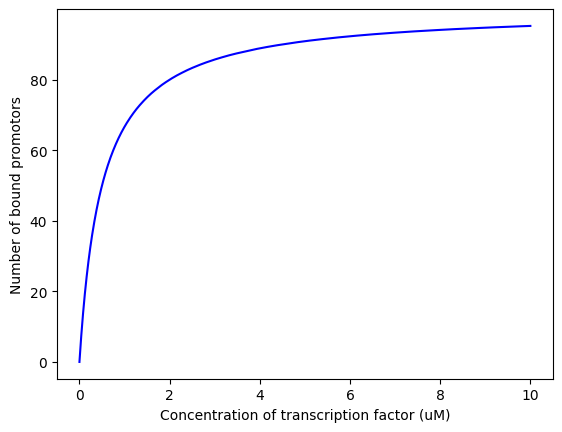

In [7]:

# Parameter array
paramArray = np.arange(0, 10.01, 0.01)  # Equivalent to MATLAB's 0:0.01:10
b_storage = np.zeros(paramArray.size)

# Loop over parameter array
for iParam, C in enumerate(paramArray):
    
    # Parameters
    kon = 0.01  # attachment rate, s^-1 uM^-1
    koff = 0.005  # unbinding rate s^-1
    initialCondition = [0, 100]
    
    # System of differential equations
    def dxdt(t, x):
        b, u = x
        dbdt = +kon * C * u - koff * b
        dudt = -kon * C * u + koff * b
        return [dbdt, dudt]
    
    # Solve the system of differential equations
    sol = solve_ivp(dxdt, [0.0, 1000], initialCondition, method='RK45', dense_output=True)
    
    # Store the number of bound promotors at the end of simulation
    b_storage[iParam] = sol.y[0, -1]

# Plotting
plt.figure()
plt.plot(paramArray, b_storage, '-b')
plt.xlabel('Concentration of transcription factor (uM)')
plt.ylabel('Number of bound promotors')
plt.show()

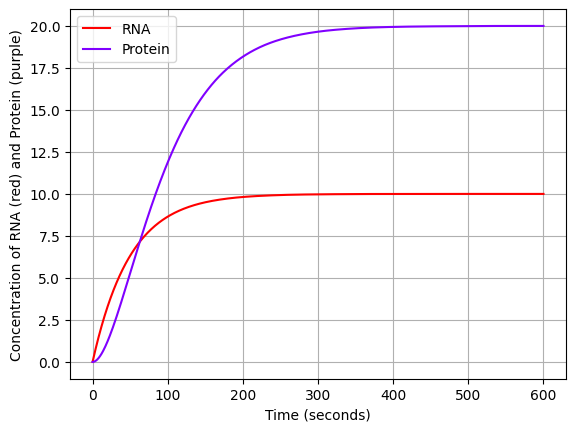

In [8]:

#########################################################

# Parameters
gamma_m = 0.2  # Rate of mRNA creation
delta_m = 0.02  # Rate of mRNA degradation
gamma_p = 0.04  # Rate of protein creation
delta_p = 0.02  # Rate of protein degradation

# Define the system of differential equations
def dxdt(t, x):
    m, p = x
    dmdt = +gamma_m - delta_m * m
    dpdt = +gamma_p * m - delta_p * p
    return [dmdt, dpdt]

# Initial conditions
initialCondition = [0, 0]

# Solve the system of differential equations
sol = solve_ivp(dxdt, [0.0, 600], initialCondition, method='RK45', dense_output=True, t_eval=np.linspace(0, 600, 600))

# Plotting
plt.figure()
plt.plot(sol.t, sol.y[0], '-r', label='RNA')  # red for RNA
plt.plot(sol.t, sol.y[1], '-', color=[0.5, 0, 1], label='Protein')  # purple for protein
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration of RNA (red) and Protein (purple)')
plt.grid(True)  # Equivalent to MATLAB's 'box on'
plt.legend()
plt.show()

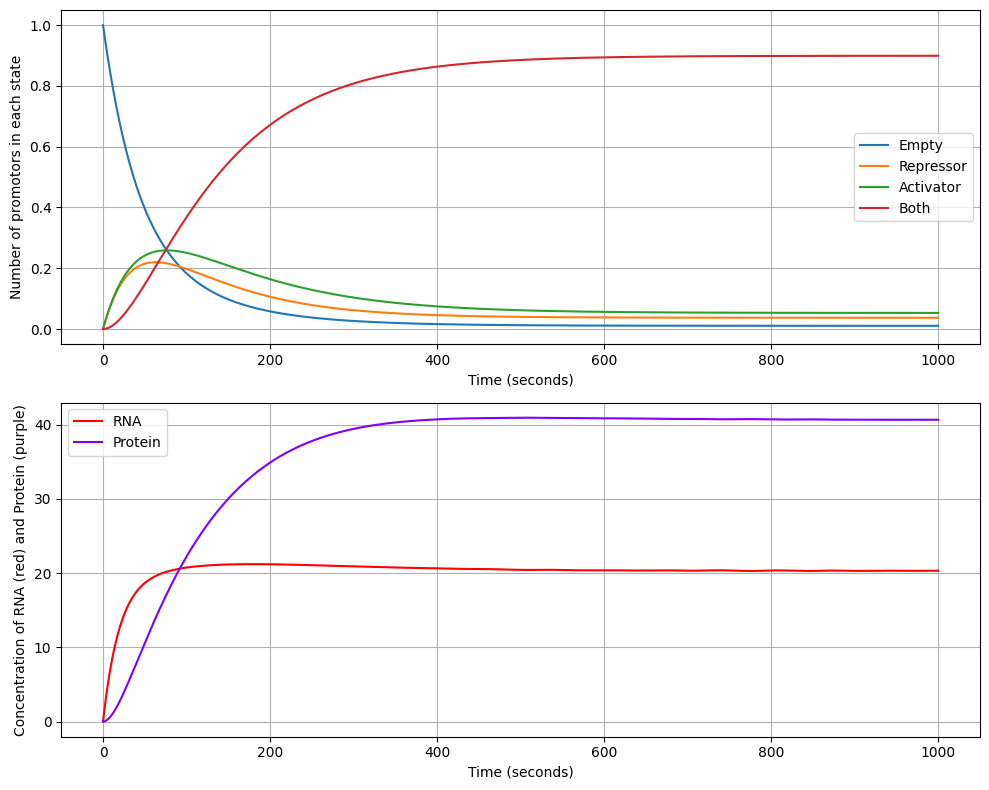

In [9]:

#########################################################


# Parameters
kon = 0.001  # s^-1 uM^-1
koff = 0.0005  # s^-1
delta_m = 0.05
gamma_p = 0.02
delta_p = 0.01
I = 10  # concentration of inhibitory transcription factor (uM)
C = 10  # concentration of activatory transcription factor (uM)

# gamma_m as a function
def gamma_m(p0, pr, pa, par):
    return 1.0 * p0 + 0.0 * pr + 2.0 * pa + 1.0 * par

# Matrix M function
def M(t):
    return np.array([[-kon * C - kon * I, +koff * I, +koff, 0],
                     [+kon * I, -koff * I - kon * C, 0, +koff],
                     [+kon * C, 0, -koff - kon * I, +koff],
                     [0, +kon * C, +kon * I, -2 * koff]])

# Differential equations
def dxdt(t, x):
    p0, pr, pa, par, m, p = x
    dm_dt = gamma_m(p0, pr, pa, par) - delta_m * m
    dp_dt = gamma_p * m - delta_p * p
    promoter_states = M(t) @ np.array([p0, pr, pa, par])
    return np.concatenate((promoter_states, [dm_dt, dp_dt]))

# Initial conditions
initialCondition = [1, 0, 0, 0, 0, 0]

# Solve the system of differential equations
sol = solve_ivp(dxdt, [0.0, 1000], initialCondition, method='RK45', dense_output=True, t_eval=np.linspace(0, 1000, 1000))

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Promotor states
axs[0].plot(sol.t, sol.y[0:4].T)
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('Number of promotors in each state')
axs[0].legend(['Empty', 'Repressor', 'Activator', 'Both'])
axs[0].grid(True)

# RNA and Protein concentrations
axs[1].plot(sol.t, sol.y[4], '-r', label='RNA')  # Red for RNA
axs[1].plot(sol.t, sol.y[5], '-', color=[0.5, 0, 1], label='Protein')  # Purple for protein
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Concentration of RNA (red) and Protein (purple)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

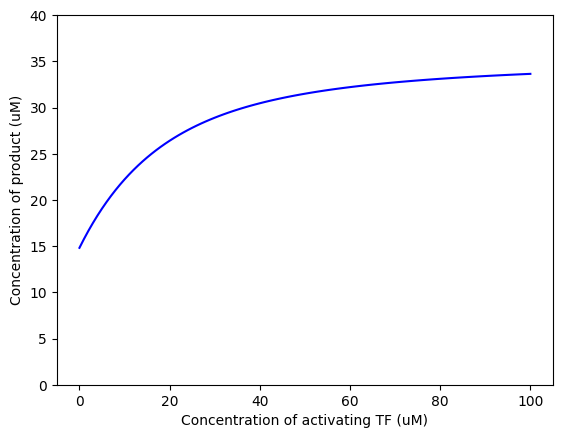

In [10]:

# Parameter array
paramArray = np.arange(0, 101, 1)  # Equivalent to MATLAB's 0:1:100
# Uncomment the next line to make a log plot
# paramArray = np.logspace(-1, 3, 200)

g_storage = np.zeros(len(paramArray))

# Loop over parameter array
for iParam, C in enumerate(paramArray):
    
    # Parameters
    kon = 0.001  # s^-1 uM^-1
    koff = 0.0005  # s^-1
    delta_m = 0.05
    gamma_p = 0.02
    delta_p = 0.01
    I = 10  # concentration of inhibitory transcription factor (uM)

    # Define the matrix M function
    def M(t):
        return np.array([[-kon * C - kon * I, +koff * I, +koff, 0],
                         [+kon * I, -koff * I - kon * C, 0, +koff],
                         [+kon * C, 0, -koff - kon * I, +koff],
                         [0, +kon * C, +kon * I, -2 * koff]])

    # gamma_m function
    def gamma_m(p0, pr, pa, par):
        return 1.0 * p0 + 0.0 * pr + 2.0 * pa + 1.0 * par

    # Differential equations
    def dxdt(t, x):
        p0, pr, pa, par, m, p = x
        dm_dt = gamma_m(p0, pr, pa, par) - delta_m * m
        dp_dt = gamma_p * m - delta_p * p
        promoter_states = M(t) @ np.array([p0, pr, pa, par])
        return np.concatenate((promoter_states, [dm_dt, dp_dt]))

    # Initial conditions
    initialCondition = [1, 0, 0, 0, 0, 0]

    # Solve the system of differential equations
    sol = solve_ivp(dxdt, [0.0, 100], initialCondition, method='RK45', dense_output=True)

    # Store the final concentration of the product
    g_storage[iParam] = sol.y[5, -1]

# Plotting
plt.figure()
plt.plot(paramArray, g_storage, '-b')
plt.xlabel('Concentration of activating TF (uM)')
plt.ylabel('Concentration of product (uM)')
plt.ylim([0, 40])
plt.show()

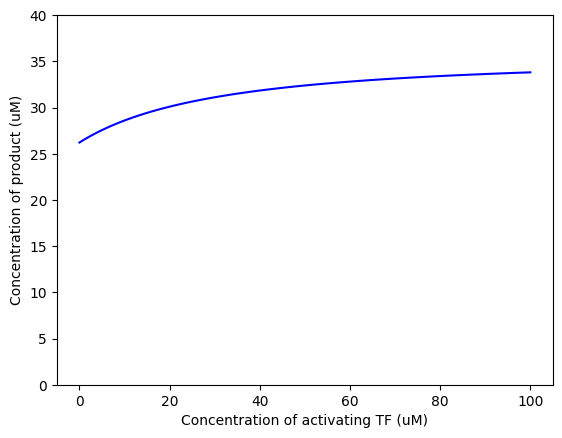

In [11]:

#########################################################

# Parameter array
paramArray = np.arange(0, 101, 1)  # Equivalent to MATLAB's 0:1:100
# Uncomment the next line to make a log plot
# paramArray = np.logspace(-1, 3, 200)

g_storage = np.zeros(len(paramArray))

# Loop over parameter array
for iParam, C in enumerate(paramArray):
    
    # Parameters
    kon = 0.001  # s^-1 uM^-1
    koff = 0.0005  # s^-1
    delta_m = 0.05
    gamma_p = 0.02
    delta_p = 0.01
    gamma_p2 = 0.1  # Enhanced protein production rate due to positive feedback
    I = 10  # Inhibitory TF concentration (uM)
    
    # Matrix M function including feedback from the product (pb)
    def M(pb, t):
        return np.array([[-kon * (C + pb) - kon * I, +koff * I, +koff, 0],
                         [+kon * I, -koff * I - kon * (C + pb), 0, +koff],
                         [+kon * (C + pb), 0, -koff - kon * I, +koff],
                         [0, +kon * (C + pb), +kon * I, -2 * koff]])

    # gamma_m function
    def gamma_m(p0, pr, pa, par):
        return 1.0 * p0 + 0.0 * pr + 2.0 * pa + 1.0 * par

    # Differential equations
    def dxdt(t, x):
        p0, pr, pa, par, m, p, mb, pb = x
        dm_dt = gamma_m(p0, pr, pa, par) - delta_m * m
        dp_dt = gamma_p * m - delta_p * p
        dmb_dt = gamma_m(p0, pr, pa, par) - delta_m * mb
        dpb_dt = gamma_p2 * mb - delta_p * pb
        promoter_states = M(pb, t) @ np.array([p0, pr, pa, par])
        return np.concatenate((promoter_states, [dm_dt, dp_dt, dmb_dt, dpb_dt]))

    # Initial conditions
    initialCondition = [1, 0, 0, 0, 0, 0, 0, 0]

    # Solve the system of differential equations
    sol = solve_ivp(dxdt, [0.0, 100], initialCondition, method='RK45', dense_output=True)

    # Store the final concentration of the regular product
    g_storage[iParam] = sol.y[5, -1]

# Plotting
plt.figure()
plt.plot(paramArray, g_storage, '-b')
plt.xlabel('Concentration of activating TF (uM)')
plt.ylabel('Concentration of product (uM)')
plt.ylim([0, 40])
# Uncomment the next line to make a log plot
# plt.xscale('log')
plt.show()